## Custom Deep learning

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [15]:
tf_flowers = tfds.image_classification.TFFlowers

In [16]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

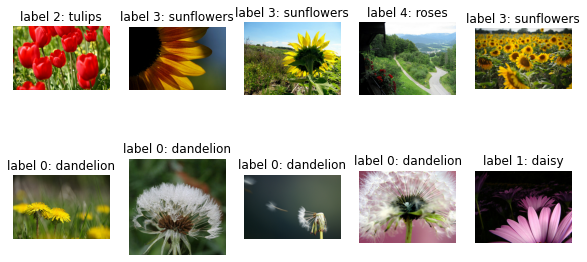

In [17]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [18]:
IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [19]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [20]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=5, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

In [22]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [23]:
BATCH_SIZE = 20
SHUFFLE_BUFFER_SIZE = 1000

In [24]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [25]:
for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape, label_batch.shape

(TensorShape([20, 160, 160, 3]), TensorShape([20]))

In [26]:
validation_steps = 15
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

15/15 [==============================] - 0s 9ms/step - loss: 1.6169 - accuracy: 0.1933
initial loss: 1.62
initial accuracy: 0.19


In [27]:
EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/15
147/147 [==============================] - 21s 144ms/step - loss: 1.3275 - accuracy: 0.4421 - val_loss: 1.1201 - val_accuracy: 0.5368
Epoch 2/15
147/147 [==============================] - 3s 19ms/step - loss: 1.0327 - accuracy: 0.5855 - val_loss: 0.9903 - val_accuracy: 0.6104
Epoch 3/15
147/147 [==============================] - 3s 19ms/step - loss: 0.8821 - accuracy: 0.6652 - val_loss: 1.0664 - val_accuracy: 0.5858
Epoch 4/15
147/147 [==============================] - 3s 18ms/step - loss: 0.7575 - accuracy: 0.7139 - val_loss: 0.9809 - val_accuracy: 0.6158
Epoch 5/15
147/147 [==============================] - 3s 19ms/step - loss: 0.6435 - accuracy: 0.7691 - val_loss: 1.2819 - val_accuracy: 0.5123
Epoch 6/15
147/147 [==============================] - 3s 19ms/step - loss: 0.5519 - accuracy: 0.8048 - val_loss: 0.9590 - val_accuracy: 0.6512
Epoch 7/15
147/147 [==============================] - 3s 19ms/step - loss: 0.4490 - accuracy: 0.8522 - val_loss: 1.0353 - val_accuracy: 0.61

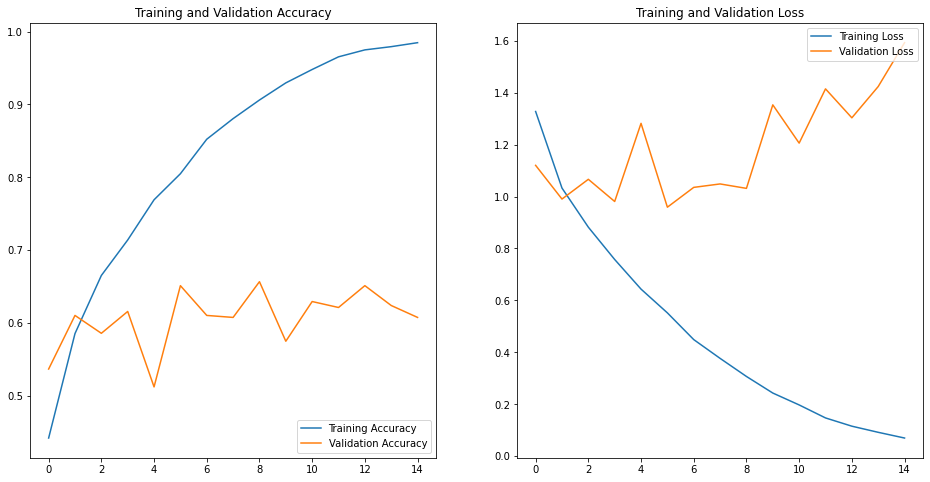

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

array([[7.39372277e-04, 8.63057503e-05, 4.99525107e-03, 9.10907507e-01,
        8.32715407e-02],
       [9.99408364e-01, 5.88481547e-04, 2.29235047e-06, 5.41749179e-09,
        9.12351481e-07],
       [9.93117929e-01, 1.39568793e-03, 3.82919749e-03, 1.28672470e-03,
        3.70460824e-04],
       [1.69619337e-01, 1.38854748e-02, 9.66467857e-02, 2.07662731e-02,
        6.99082136e-01],
       [9.71442580e-01, 6.88282249e-04, 7.19355769e-04, 2.22094427e-03,
        2.49289181e-02],
       [9.58626091e-01, 4.93384060e-03, 2.80012400e-03, 5.83501905e-03,
        2.78049745e-02],
       [5.24534052e-03, 3.51847529e-01, 5.82138836e-01, 2.94465311e-02,
        3.13217640e-02],
       [2.81610817e-01, 5.59514277e-02, 1.66346893e-01, 2.57346011e-03,
        4.93517309e-01],
       [2.52731759e-02, 1.31430724e-07, 1.21430123e-04, 9.74538386e-01,
        6.69051078e-05],
       [9.99994397e-01, 4.35972970e-06, 2.42829934e-09, 4.52197169e-10,
        1.23130371e-06],
       [9.99993086e-01, 1.7793

In [30]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([3, 0, 0, 4, 0, 0, 2, 4, 3, 0, 0, 0, 3, 4, 0, 3, 2, 0, 0, 4])

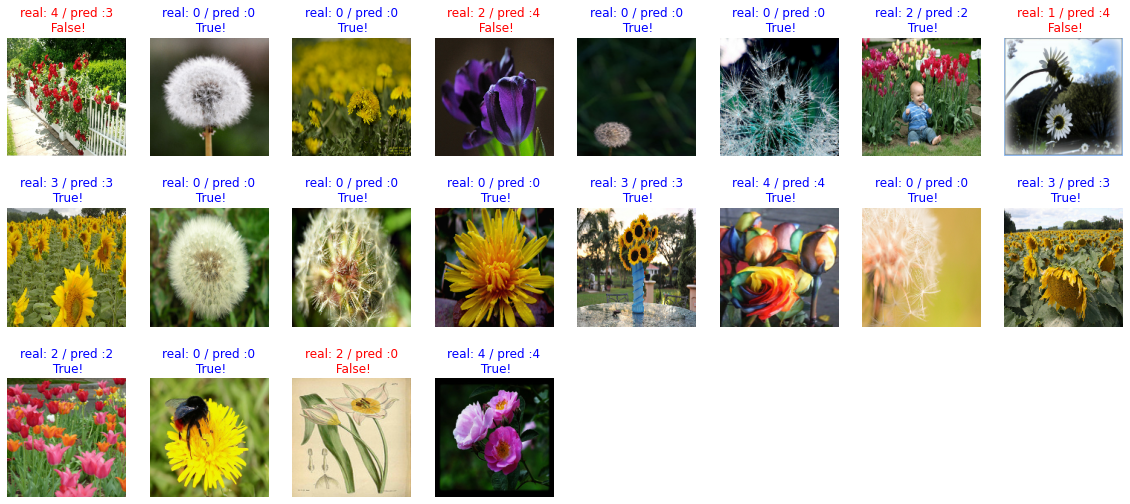

In [31]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [32]:
count = 0
for image, label, prediction in zip(images, labels, predictions):
  correct = label == prediction
  if  correct:
    count +=1


print(count / 20 * 100)

80.0


### 우리가 직접 만든 딥러닝 모델같은 경우 층수도 적었기에 좋은 효과를 내지 못한 것 같다. 여기서 우리가 할 수 있는 일은   
### 1. 최적화함수, learning rate, epoch 수를 증감시켜준다.   
### 2. 모델을 바꾼다.   

## VGG16 with RMSprop

In [117]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

feature_batch = base_model(image_batch)
feature_batch.shape

base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

dense_layer = tf.keras.layers.Dense(512, activation='relu')
prediction_layer = tf.keras.layers.Dense(5, activation='softmax')


prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)

base_model.trainable = False
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])

base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

validation_steps=15
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

EPOCHS = 10 

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

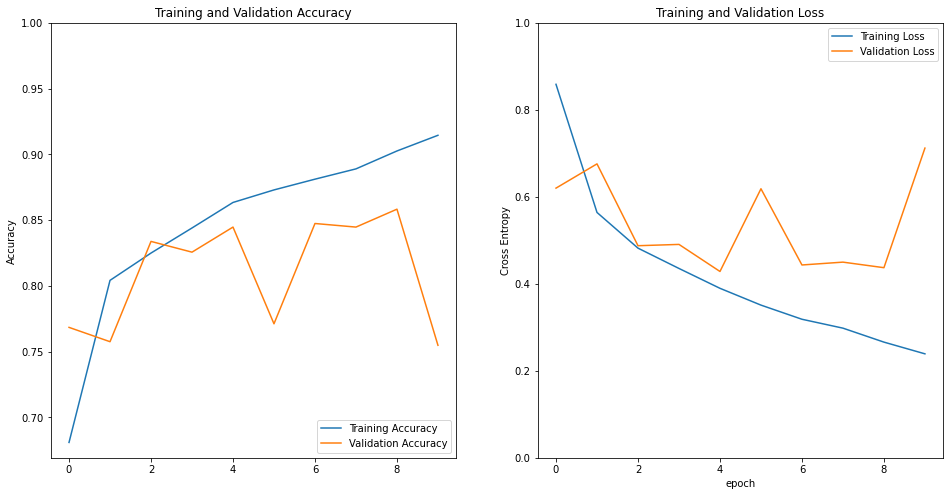

In [118]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [119]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

count = 0
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 20 * 100) 

85.0


### 이번 실험의 기준점이 되는 RMSprop 최적화 함수를 사용한 VGG16 모델은 85%의 정확도를 구사해낸다. VGG16 모델이 임의대로 만든 알고리즘보다 더 정확한건 사실이나 좀 더 정확성을 높이기 위해 다른 걸 바꿔가면서 확인해보아야 한다.

## VGG 16 with Adam

In [94]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

In [95]:
feature_batch = base_model(image_batch)
feature_batch.shape

TensorShape([20, 5, 5, 512])

In [96]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [97]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [98]:
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(20, 512)


In [99]:
dense_layer = tf.keras.layers.Dense(512, activation='relu')
prediction_layer = tf.keras.layers.Dense(5, activation='softmax')

# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)

(20, 5)


In [100]:
base_model.trainable = False

In [101]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])

In [102]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [103]:
validation_steps=15
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

15/15 [==============================] - 1s 43ms/step - loss: 1.7374 - accuracy: 0.1500
initial loss: 1.74
initial accuracy: 0.15


In [104]:
EPOCHS = 10   # 이번에는 이전보다 훨씬 빠르게 수렴되므로 5Epoch이면 충분합니다.

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
147/147 [==============================] - 9s 60ms/step - loss: 0.8464 - accuracy: 0.6785 - val_loss: 0.5870 - val_accuracy: 0.7711
Epoch 2/10
147/147 [==============================] - 8s 56ms/step - loss: 0.5277 - accuracy: 0.8246 - val_loss: 0.4956 - val_accuracy: 0.8229
Epoch 3/10
147/147 [==============================] - 8s 56ms/step - loss: 0.4456 - accuracy: 0.8450 - val_loss: 0.5213 - val_accuracy: 0.8011
Epoch 4/10
147/147 [==============================] - 8s 56ms/step - loss: 0.4120 - accuracy: 0.8539 - val_loss: 0.4927 - val_accuracy: 0.8093
Epoch 5/10
147/147 [==============================] - 8s 56ms/step - loss: 0.3654 - accuracy: 0.8706 - val_loss: 0.5335 - val_accuracy: 0.8147
Epoch 6/10
147/147 [==============================] - 8s 56ms/step - loss: 0.3271 - accuracy: 0.8822 - val_loss: 0.4542 - val_accuracy: 0.8338
Epoch 7/10
147/147 [==============================] - 8s 56ms/step - loss: 0.2964 - accuracy: 0.8975 - val_loss: 0.4540 - val_accuracy: 0.8420

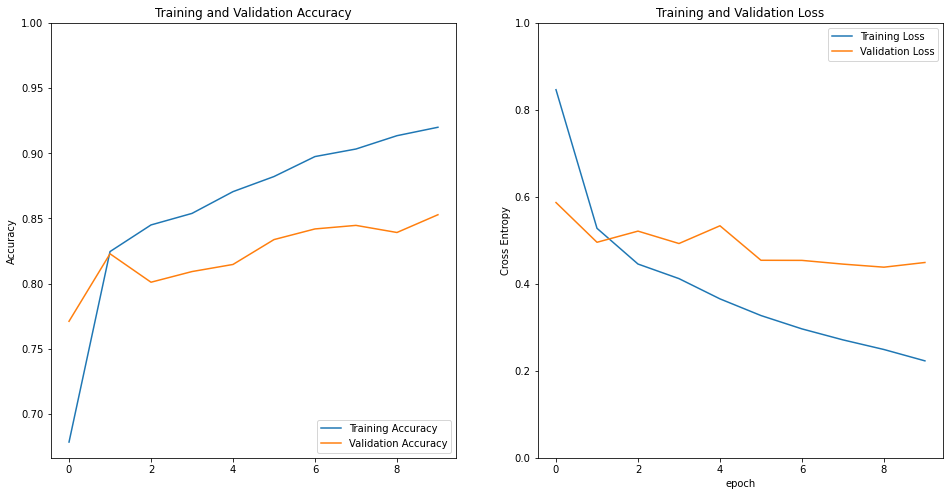

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [106]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

array([[2.52316636e-03, 2.62258854e-03, 8.63392532e-01, 2.55717523e-03,
        1.28904566e-01],
       [9.99996901e-01, 2.50486391e-06, 3.00457370e-09, 1.64784790e-08,
        5.85280475e-07],
       [8.21681201e-01, 6.01267256e-02, 4.27458389e-03, 9.73124728e-02,
        1.66051276e-02],
       [1.15713156e-05, 3.10757896e-05, 5.26718855e-01, 3.88983563e-06,
        4.73234594e-01],
       [9.40154970e-01, 5.69008924e-02, 4.14099544e-04, 5.45396877e-04,
        1.98460184e-03],
       [9.96918678e-01, 2.27949605e-03, 8.20273563e-05, 6.94124552e-04,
        2.56336480e-05],
       [1.12798123e-03, 4.63076867e-05, 9.92926121e-01, 6.40652492e-04,
        5.25905145e-03],
       [4.28430498e-01, 5.68205893e-01, 1.12358557e-05, 3.18128755e-03,
        1.71193140e-04],
       [1.54059846e-03, 2.25177537e-05, 3.24218720e-03, 9.77837622e-01,
        1.73569433e-02],
       [9.99992251e-01, 7.27401812e-06, 1.96549959e-08, 1.04202947e-07,
        3.19099513e-07],
       [9.97458756e-01, 2.3764

In [107]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([2, 0, 0, 2, 0, 0, 2, 1, 3, 0, 0, 0, 3, 4, 0, 3, 2, 0, 2, 4])

In [109]:
count = 0
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 20 * 100) 

95.0


### 동일한 환경에서 Adam으로 최적화 함수를 바꿔주었는데 정확도가 10% 증가했다. 즉 최적화 함수를 어떤것을 사용하는지에 따라 예측도가 커질 수 있다.

## ResNet101V2

In [33]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.ResNet101V2(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

In [34]:
image_batch.shape

TensorShape([20, 160, 160, 3])

In [35]:
feature_batch = base_model(image_batch)
feature_batch.shape

TensorShape([20, 5, 5, 2048])

In [37]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [38]:
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(20, 2048)


In [39]:
dense_layer = tf.keras.layers.Dense(512, activation='relu')
prediction_layer = tf.keras.layers.Dense(5, activation='softmax')

# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)

(20, 5)


In [40]:
base_model.trainable = False

In [41]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Model)          (None, 5, 5, 2048)        42626560  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2565      
Total params: 43,678,213
Trainable params: 1,051,653
Non-trainable params: 42,626,560
_________________________________________________________________


In [43]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [44]:
validation_steps=15
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

15/15 [==============================] - 1s 42ms/step - loss: 2.2107 - accuracy: 0.1600
initial loss: 2.21
initial accuracy: 0.16


In [45]:
EPOCHS = 7

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/7
147/147 [==============================] - 101s 685ms/step - loss: 0.7951 - accuracy: 0.7728 - val_loss: 0.4232 - val_accuracy: 0.8610
Epoch 2/7
147/147 [==============================] - 9s 58ms/step - loss: 0.3387 - accuracy: 0.8948 - val_loss: 0.4866 - val_accuracy: 0.8311
Epoch 3/7
147/147 [==============================] - 10s 71ms/step - loss: 0.1863 - accuracy: 0.9336 - val_loss: 0.4648 - val_accuracy: 0.8665
Epoch 4/7
147/147 [==============================] - 8s 57ms/step - loss: 0.1047 - accuracy: 0.9659 - val_loss: 0.6272 - val_accuracy: 0.8447
Epoch 5/7
147/147 [==============================] - 8s 55ms/step - loss: 0.0715 - accuracy: 0.9799 - val_loss: 0.8450 - val_accuracy: 0.8283
Epoch 6/7
147/147 [==============================] - 8s 57ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.7090 - val_accuracy: 0.8665
Epoch 7/7
147/147 [==============================] - 9s 60ms/step - loss: 0.0605 - accuracy: 0.9840 - val_loss: 0.6726 - val_accuracy: 0.8828


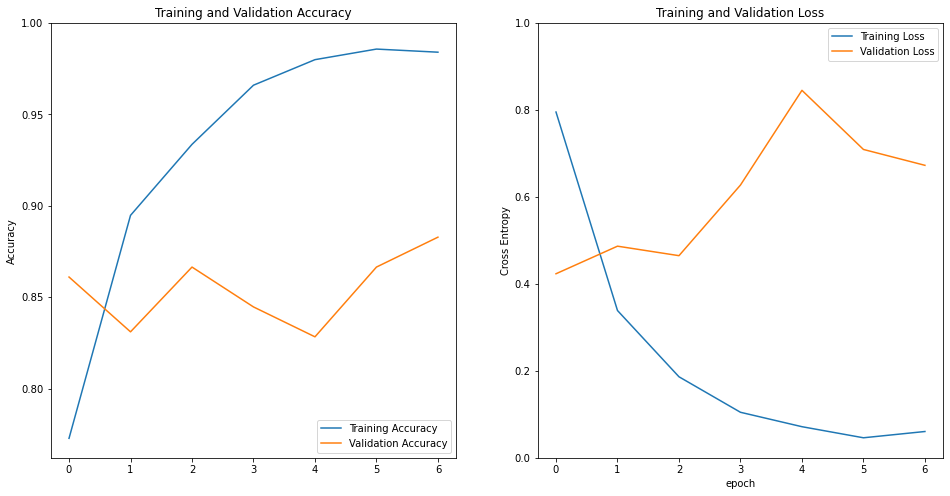

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [47]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

array([[1.53049273e-09, 3.07454132e-11, 1.00000000e+00, 1.92102945e-10,
        1.52286350e-09],
       [1.00000000e+00, 1.63221885e-23, 1.61420631e-23, 5.43144118e-28,
        9.51408661e-22],
       [9.83262539e-01, 7.21326927e-08, 1.24084715e-06, 1.67360362e-02,
        1.23390080e-07],
       [1.43369229e-18, 4.53970493e-14, 9.99998450e-01, 2.02078238e-17,
        1.50535413e-06],
       [9.99999881e-01, 1.18619845e-07, 2.88443380e-10, 6.44232627e-12,
        5.61491609e-09],
       [1.00000000e+00, 2.68734601e-11, 2.36613995e-14, 1.98928066e-18,
        3.38554940e-16],
       [4.56122564e-07, 2.85090573e-09, 9.99995828e-01, 2.36262321e-09,
        3.74024194e-06],
       [4.20107227e-03, 9.94846344e-01, 3.95548734e-04, 1.36299015e-04,
        4.20668919e-04],
       [4.49251911e-06, 1.78825008e-08, 7.52191467e-04, 9.99241233e-01,
        2.00068530e-06],
       [1.00000000e+00, 1.02795021e-19, 4.57197496e-26, 9.53297787e-22,
        1.41099869e-18],
       [1.00000000e+00, 1.2226

In [48]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([2, 0, 0, 2, 0, 0, 2, 1, 3, 0, 0, 0, 3, 4, 0, 3, 2, 0, 2, 4])

In [49]:
count = 0
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 20 * 100)

95.0


### VGG16 대신에 ResNet을 대입한 결과 마찬가지로 95%로 결과값이 올라가는 것을 볼 수 있다.

## 총평

### 이전까지 정확도를 올리는 방법중에서 내가 제일 선호하는 방식은 데이터 수를 어느정도 늘리는 것이었다. 하지만 이번 과제는 기본적으로 적은 데이터셋을 갖고 최대한의 효과를 뽑아내야 하는 것이었다. 그렇기에 차선책인 모델을 바꿔주는 방법 그리고 optimizer함수를 RMSprop에서 Adam으로 바꿔주는 방식을 선택했고 이는 적중했다.    
### 이번 프로젝트를 통해 얻은 결과 : 모델링을 잘 하는 것과 활성화 함수를 조절하는 것 그리고 학습률과 같은 하이퍼 파라미터를 조정해 주는것도 중요하다는 것을 느꼈다.